In [1]:
from dipy.io.image import load_nifti
from dipy.io import read_bvals_bvecs
from dipy.core.gradients import gradient_table
import numpy as np
import os
import matplotlib.pyplot as plt

base_dir = "/storage/users/arihant"
base_dir_7t = [base_dir + "/HCP_7T/" + i   for i in os.listdir(base_dir + "/HCP_7T") if len(i) == 6]
base_dir_3t = [base_dir + "/HCP_3T/" + i   for i in os.listdir(base_dir + "/HCP_3T") if len(i) == 6]

path_7t = {}
path_3t = {}


for i in base_dir_7t:
    path_7t[i[-6:]] = {"3d_scan" : i + "/T1w/T1w_acpc_dc_restore_1.05.nii.gz" ,"data" : i + "/T1w/Diffusion_7T/data.nii.gz" 
                       , "bvals" : i + "/T1w/Diffusion_7T/bvals" , "bvecs" : i + "/T1w/Diffusion_7T/bvecs"
                      , "brain_mask" : i + "/T1w/Diffusion_7T/nodif_brain_mask.nii.gz"
                      , "grad_dev" : i + "/T1w/Diffusion_7T/grad_dev.nii.gz"}
for i in base_dir_3t:
    path_3t[i[-6:]] = {"3d_scan" : i + "/T1w/T1w_acpc_dc_restore_1.25.nii.gz" , "data" : i + "/T1w/Diffusion/data.nii.gz" 
                       , "bvals" : i + "/T1w/Diffusion/bvals" , "bvecs" : i + "/T1w/Diffusion/bvecs"
                       , "brain_mask" : i + "/T1w/Diffusion/nodif_brain_mask.nii.gz"
                      , "grad_dev" : i + "/T1w/Diffusion/grad_dev.nii.gz"}
path = {'3T': path_3t, "7T": path_7t}
p = list(path_7t.keys())
q = list(path_3t.keys())
common = list(set(p) & set(q))


print("number of common Subjects ",len(common))
def load_hcp(id_load,res,ret_img = False,crop = 10):
    load_from = path[res][id_load]
    if ret_img:
        data , affine, img = load_nifti(load_from["data"], return_img=ret_img)
    else:
        data , affine= load_nifti(load_from["data"], return_img=ret_img)
    mask,affine = load_nifti(load_from["brain_mask"], return_img=ret_img)
    scan, affine = load_nifti(load_from["3d_scan"], return_img=False)
    
    bvals, bvecs = read_bvals_bvecs(load_from['bvals'], load_from['bvecs'])
    gtab = gradient_table(bvals, bvecs)
    
    return data[:,:,crop:-crop,:],mask[:,:,crop:-crop],scan,gtab

def mean_volume(data,gtab,b):
    if b not in gtab.bvals:
        print("invalid b value")
        return None
    else:
        return np.mean(data , axis = 3 ,where = gtab.bvals == b)

number of common Subjects  171


In [2]:
data,mask,scan,gtab = load_hcp('130114','3T',crop = 30)

In [3]:
data_mean = mean_volume(data,gtab,5)

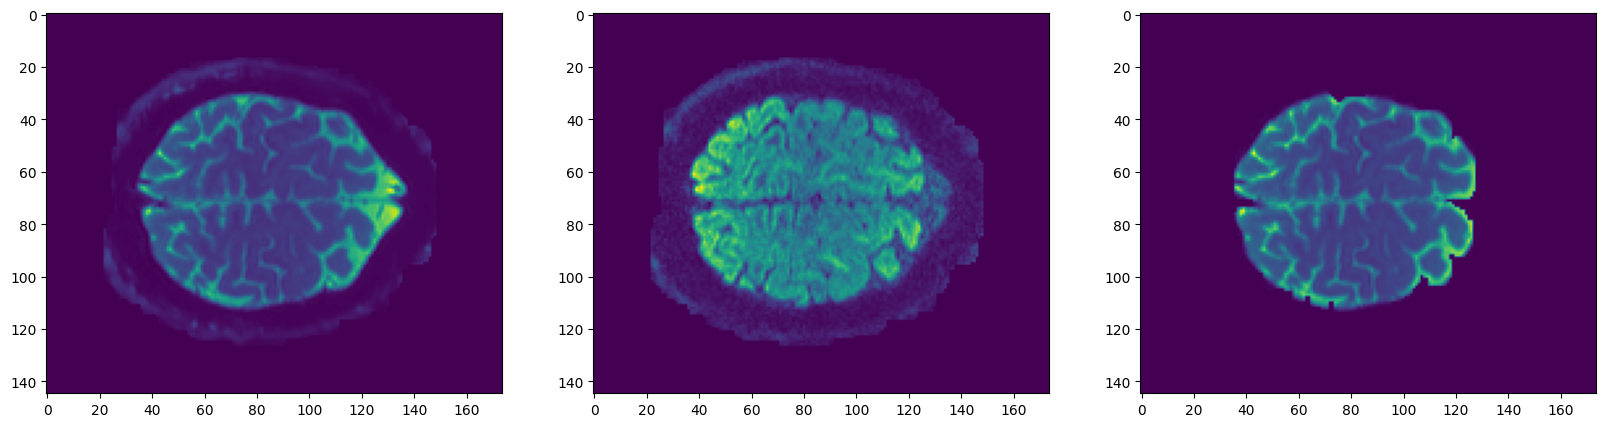

In [4]:
i=70
f, axis = plt.subplots(1, 3)
f.set_figwidth(20)
f.set_figheight(10)
axis[0].imshow(data_mean[:,:,i])
axis[1].imshow(data[:,:,i,1])
axis[2].imshow(mask[:,:,i]*data_mean[:,:,i])

In [5]:
gtab.bvals

array([   5., 1000., 2000., 3005.,  995., 2995., 2005.,  990., 1990.,
       2995., 1000., 1990., 2995., 1005., 1995., 2990.,    5.,  995.,
       2000., 3010., 3005.,  995., 2010.,  995., 1990., 2990., 1000.,
       2000., 3005., 1000., 1995., 2985.,    5., 3005.,  995., 2005.,
        990., 1985., 2990.,  995., 2985., 1995., 3005.,  995., 2005.,
       1000., 1990., 2995.,    5., 1005., 2005., 2995., 2995., 1010.,
       1985., 1005., 2990., 2005.,  995., 1990., 3005.,  995., 2990.,
       1995.,    5.,  990., 2005., 2995., 1000., 2000., 3005.,  995.,
       2005., 3000., 1000., 2000., 3010.,  990., 2005., 1995.,    5.,
       1000., 3010., 2985., 1005., 1990., 3000., 1000., 2005., 3000.,
        990., 2005., 2990., 3000., 1000.,    5., 2995., 1000., 1995.,
       1995., 1005., 2005., 2995., 1000., 2010., 2995., 1005., 2000.,
       3010., 1000., 2005., 2990.,    5.,  995., 2985., 2005., 1000.,
       2005., 2985.,  995., 2000., 2985.,  995., 2005., 2990., 1005.,
       2000., 3005.,

In [6]:
len(gtab.bvals)

288

In [7]:
len(gtab.bvecs[np.where(gtab.bvals > 5)[0]])

270

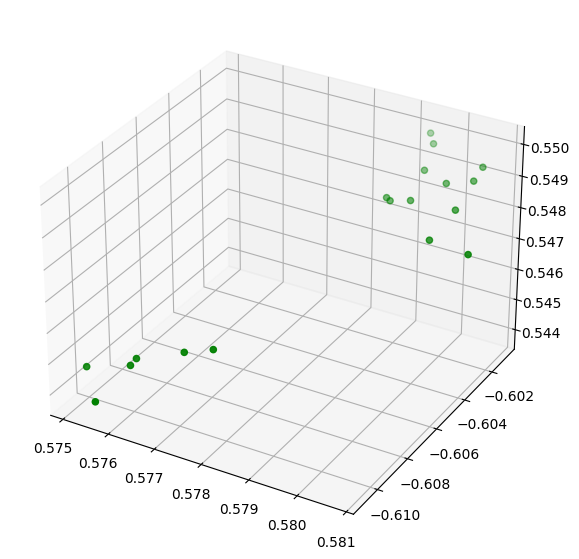

In [8]:
# %matplotlib notebook
# import plotly.graph_objects as go
# import numpy as np

x , y, z = gtab.bvecs[np.where(gtab.bvals == 5)[0]][:,0],gtab.bvecs[np.where(gtab.bvals == 5)[0]][:,1],gtab.bvecs[np.where(gtab.bvals == 5)[0]][:,2]

# fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,

#                                    mode='markers')])
# fig.show()

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")

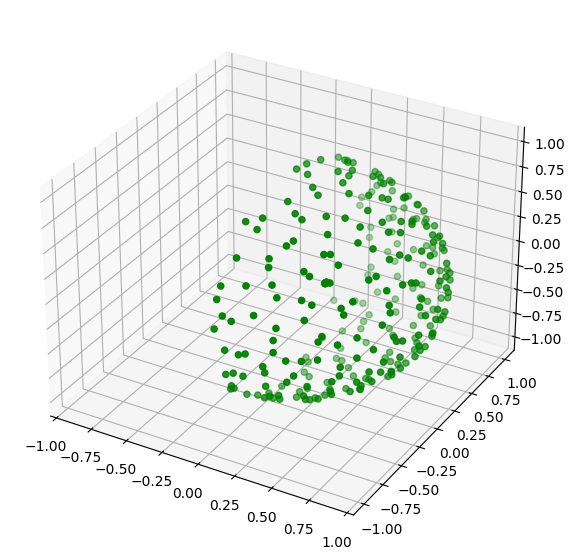

In [9]:

import plotly.graph_objects as go
import numpy as np

x , y, z = gtab.bvecs[:,0],gtab.bvecs[:,1],gtab.bvecs[:,2]

# fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
#                                    mode='markers')])
# fig.show()

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.set_xlim(-1,1)
# Creating plot
ax.scatter3D(x, y, z, color = "green")


In [10]:
data_mean.shape

(145, 174, 85)

## DSM thing

In [11]:
dsm6 = np.array([0.91, 0.416, 0,0, 0.91, 0.416,0.416, 0, 0.91,0.91, -0.416, 0,0, 0.91, -0.416,-0.416, 0, 0.91])

In [12]:
dsm6 = dsm6.reshape(6,3)
dsm_norm = np.copy(dsm6)

In [13]:
dsm6_mag = np.sqrt(dsm6[:,0]**2 + dsm6[:,1]**2 + dsm6[:,2]**2)
for i in range(3):
    dsm_norm[:,i] = dsm6[:,i] / dsm6_mag

In [14]:
dsm_norm

array([[ 0.90947448,  0.41575976,  0.        ],
       [ 0.        ,  0.90947448,  0.41575976],
       [ 0.41575976,  0.        ,  0.90947448],
       [ 0.90947448, -0.41575976,  0.        ],
       [ 0.        ,  0.90947448, -0.41575976],
       [-0.41575976,  0.        ,  0.90947448]])

In [15]:
def rot3d(arg):
    x,y,z = arg[0],arg[1],arg[2]
    Rx = np.array([[1 ,0 ,0 ],[0,np.cos(x),-np.sin(x)],[0 ,np.sin(x) ,np.cos(x)]])
    Ry = np.array([[np.cos(y),0 ,np.sin(y) ],[0,1,0],[-np.sin(y),0,np.cos(y)]])
    Rz = np.array([[np.cos(z) ,-np.sin(z) ,0 ],[np.sin(z),np.cos(z),0],[0 ,0,1]])
    R = Rx @ Ry @ Rz
    return R

def amatrix(mat):
    
    a = [mat[:,0] * mat[:,0],2 * mat[:,0] * mat[:,1], 2* mat[:,0] * mat[:,2],
        mat[:,1] * mat[:,1],2 * mat[:,1] * mat[:,2], mat[:,2] * mat[:,2]]
    return np.array(a).T

from numpy.linalg import eig

def dtimetric(tensor,mask):
    ret = {}
    mask = mask >0.1
    sz = mask.shape
    v1 = np.zeros((sz[0],sz[1],sz[2],3))
    v2 = np.zeros((sz[0],sz[1],sz[2],3))
    v3 = np.zeros((sz[0],sz[1],sz[2],3))
    l1 = np.zeros((sz))
    l2 = np.zeros((sz))
    l3 = np.zeros((sz))
    md = np.zeros((sz))
    rd = np.zeros((sz))
    fa = np.zeros((sz))
    
    for i in range(sz[0]):
        for j in range(sz[1]):
            for k in range(sz[2]):
                if (mask[i,j,k]):
                    
                    
                    tensor_vox = tensor[i,j,k,:].squeeze()
                    tensor_mtx = np.zeros((3,3))
                    tensor_mtx[0,0] = tensor_vox[0]
                    tensor_mtx[0,1] = tensor_vox[1];tensor_mtx[1,0] = tensor_vox[1]
                    tensor_mtx[0,2] = tensor_vox[2];tensor_mtx[2,0] = tensor_vox[2]
                    tensor_mtx[1,1] = tensor_vox[3]
                    tensor_mtx[1,2] = tensor_vox[4];tensor_mtx[2,1] = tensor_vox[4]
                    tensor_mtx[2,2] = tensor_vox[5]
                    
                    D,V = eig(tensor_mtx)
                    MD = np.mean(D)
                    FA = np.sqrt(sum((D-MD) ** 2)) / np.sqrt(sum(D**2)) * np.sqrt(1.5)
                    
                    v1[i, j, k, :] = V[:, 2]
                    v2[i, j, k, :] = V[:, 1]
                    v3[i, j, k, :] = V[:, 0]
                    l1[i,j,k] = D[2];
                    l2[i,j,k] = D[1];
                    l3[i,j,k] = D[0];
                    fa[i,j,k] = FA;
                    md[i,j,k] = MD;
                    rd[i,j,k] = np.mean(D[0:1])
           
    ret['v1'] = v1
    ret['v2'] = v2
    ret['v3'] = v3
    ret['l1'] = l1
    ret['l2'] = l2
    ret['l3'] = l3
    ret['fa'] = fa
    ret['md'] = md
    ret['rd'] = rd                
    return ret
                    
    

In [16]:
d= np.random.rand(1,3) * 2 * np.pi
print(d[0])

[3.29900171 4.06294921 2.46844751]


In [17]:
rot3d(d[0])

array([[ 0.47282511,  0.37702423, -0.79642272],
       [-0.71335383,  0.69436263, -0.09479899],
       [ 0.51726466,  0.61295454,  0.59726376]])

In [18]:
dsm_rot = (rot3d(d[0]) @ dsm_norm.T).T

In [19]:
dsm_rot.shape

(6, 3)

In [20]:
dsm_rot

array([[ 0.58677387, -0.36008906,  0.72528084],
       [ 0.01177339,  0.59209148,  0.80578475],
       [-0.52774448, -0.38280108,  0.75825398],
       [ 0.27327086, -0.93746514,  0.21559717],
       [ 0.67401443,  0.67091869,  0.30914827],
       [-0.92090779,  0.21036656,  0.32813832]])

In [21]:
dirs = gtab.bvecs[np.where(gtab.bvals > 5)[0]]

In [22]:
dirs.shape

(270, 3)

In [23]:
ang_error = abs(dsm_rot @ dirs.T)

In [24]:
ang_error.shape

(6, 270)

In [25]:
# import scipy.io
# mat = scipy.io.loadmat('data.mat')
# mat_bvecs = np.array(mat['bvecs'])
# mat_bval = np.array(mat['bvals'])
# dirs = mat_bvecs[np.where(mat_bval>100)[0]]
# ang_error = np.degrees(np.arccos(abs(dsm_rot @ dirs.T)))
# minerrors,idx = np.amin(ang_error,1),np.argmin(ang_error,1)
# mean_ang_err = np.mean(np.amin(ang_error,1))
# print(amatrix(dirs[idx]))
# np.linalg.cond(amatrix(dirs[idx]))

In [26]:
rotang_all = [];
angerr_all  = [];
condnum_all = [];
ind_all = [];
dirs = np.array(gtab.bvecs[np.where(gtab.bvals > 5)[0]])
for i in range(0,100000):
    
    d = np.random.rand(1,3) * 2 * np.pi
    rotang = d[0]
    R = rot3d(rotang)
    dsm_rot = (rot3d(d[0]) @ dsm_norm.T).T
    
    ang_error = np.degrees(np.arccos(abs(dsm_rot @ dirs.T)))
    minerrors,idx = np.amin(ang_error,1),np.argmin(ang_error,1)

    mean_ang_err = np.mean(np.amin(ang_error,1))
    condnum = np.linalg.cond(amatrix(dirs[idx]))
    
    idx.sort()
    if (mean_ang_err < 5 and condnum < 1.6):
        if ((len(ind_all) == 0 ) or  len(np.where((ind_all == idx).all(axis=1))[0]) == 0 ):
            angerr_all.append(mean_ang_err)
            condnum_all.append(condnum)
            ind_all.append(idx)
            rotang_all.append(rotang)

/tmp/ipykernel_2962386/1817435137.py:13: RuntimeWarning: invalid value encountered in arccos
  ang_error = np.degrees(np.arccos(abs(dsm_rot @ dirs.T)))


In [27]:
ind_all

[array([ 48, 125, 166, 176, 190, 257]),
 array([ 75, 132, 156, 160, 165, 171]),
 array([  8, 180, 210, 211, 241, 244]),
 array([  8,  28,  42,  45,  76, 161]),
 array([ 60, 124, 179, 197, 231, 258]),
 array([  0,   8,  76,  84, 122, 159]),
 array([ 79, 125, 142, 166, 190, 257]),
 array([ 66, 118, 128, 139, 146, 169]),
 array([ 12, 122, 161, 207, 246, 256]),
 array([ 71, 113, 146, 147, 155, 249]),
 array([104, 108, 125, 135, 179, 221]),
 array([ 11,  20,  78, 105, 155, 156]),
 array([132, 156, 165, 171, 216, 241]),
 array([  7,  64,  71,  75, 133, 155]),
 array([ 36, 142, 166, 228, 233, 245]),
 array([ 27,  73,  90, 116, 131, 225]),
 array([ 87, 208, 234, 248, 251, 268]),
 array([ 87, 107, 135, 142, 168, 234]),
 array([  1,  36,  56, 104, 162, 184]),
 array([  1,   4,  36,  56, 170, 184]),
 array([132, 156, 160, 165, 171, 241]),
 array([  8,  12,  98, 180, 210, 244]),
 array([ 27,  56, 104, 184, 257, 266]),
 array([ 73,  90, 107, 131, 168, 251]),
 array([  2, 108, 135, 154, 221, 236]),


In [28]:
condnum_all = np.array(condnum_all)
indx  = condnum_all.argsort()[:5]
condnum_all[condnum_all.argsort()[:5]]

array([1.40995166, 1.41711997, 1.43353753, 1.43456677, 1.43535359])

In [29]:
ind_use = np.array(ind_all)[indx]
condnum_use = condnum_all[condnum_all.argsort()[:5]]
angerr_use = np.array(angerr_all)[indx]
rotang_use = np.array(rotang_all)[indx]

In [30]:
ind_use

array([[155, 180, 210, 211, 241, 244],
       [  8, 180, 210, 211, 241, 244],
       [ 73,  95, 104, 125, 196, 221],
       [155, 180, 204, 210, 211, 244],
       [ 64, 113, 155, 211, 241, 244]])

In [31]:
condnum_use

array([1.40995166, 1.41711997, 1.43353753, 1.43456677, 1.43535359])

In [32]:
angerr_use

array([2.81095543, 3.05633927, 3.74483963, 2.69389427, 3.05988482])

In [33]:
rotang_use

array([[2.42610695, 1.62364177, 2.36775805],
       [5.85579559, 1.5540997 , 2.03699253],
       [5.44656823, 4.54807565, 2.34538018],
       [4.95016661, 4.64803597, 3.28844335],
       [6.28153281, 6.2458731 , 3.25558421]])

In [34]:
gtab.bvecs[:5]

array([[ 0.575135, -0.610426,  0.544609],
       [ 0.922436, -0.301691, -0.241025],
       [ 0.353165,  0.911636,  0.210228],
       [ 0.155449, -0.279459,  0.94749 ],
       [ 0.143773,  0.839421, -0.52412 ]])

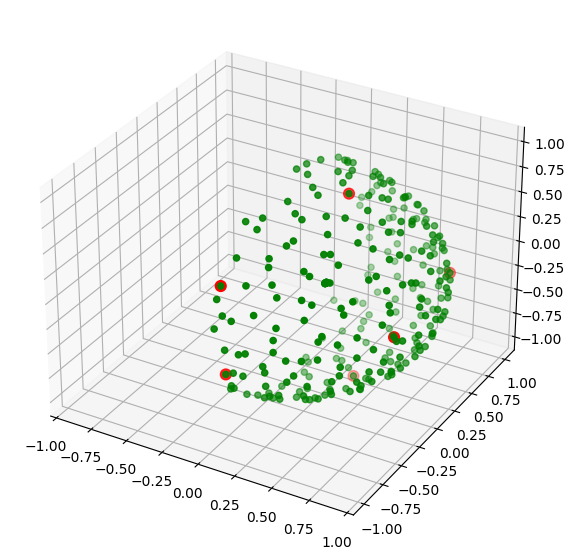

In [35]:
# %matplotlib notebook
import plotly.graph_objects as go
import numpy as np

x , y, z = gtab.bvecs[:,0],gtab.bvecs[:,1],gtab.bvecs[:,2]

# fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
#                                    mode='markers')])
# fig.show()

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.set_xlim(-1,1)
# Creating plot
ax.scatter3D(x, y, z, color = "green")
k=4



x , y, z = dirs[ind_use[k],:][:,0],dirs[ind_use[k],:][:,1],dirs[ind_use[k],:][:,2]

ax.scatter3D(x, y, z, color = "red",marker = 'o',s = 60)

Generate data for CNN

In [126]:
from numpy.linalg import inv
from numpy.linalg import pinv
from numpy.linalg import lstsq
from numpy.linalg import solve
from numpy import inf
input_all = []
tensor_all = []
b0s = data[:,:,:,np.where(gtab.bvals==5)].squeeze()
dwis = data[:,:,:,np.where(gtab.bvals>5)].squeeze()
bvals = gtab.bvals[np.where(gtab.bvals>5)]
bvecs = gtab.bvecs[np.where(gtab.bvals>5)]

In [57]:
bvals.shape

(270,)

In [58]:
bvecs.shape

(270, 3)

In [59]:
amatrix(bvecs6).shape

(6, 6)

In [77]:
bval_synth = 1000;
for i in range(5):
    b0 = b0s[:,:,:,i]
    dwis6 =  dwis[:,:,:,ind_use[i]]
    bvals6 = bvals[ind_use[i]]
    bvecs6 = bvecs[ind_use[i]]
    
    # compute apparent diffusion coefficients
    b0 = b0[...,np.newaxis]
    adcs6 = np.log(dwis6 / b0)
    
    for j in range(6):

        adcs6[:,:,:,j] = adcs6[:,:,:,j] / (-bvals6[j]) ##  in case bvalues might be different for acquired dwis
        
        adcs6vec = adcs6.reshape(data.shape[0]*data.shape[1]*data.shape[2],adcs6.shape[3])
                
#         A = amatrix(bvecs6)
#         tensor_vec = inv(A) @ adcs6vec.T
        
        
        tensor_vec = lstsq(amatrix(bvecs6),adcs6vec.T)[0]
        tensor = tensor_vec.T.reshape(data.shape[0],data.shape[1],data.shape[2],6)
        tensor = np.nan_to_num(tensor)
        tensor[tensor == inf] = 0
        tensor_all.append(tensor)
        
        ## synthesize dwis along DSM6 dirs
        dwis6norm_vec_synth = np.exp(-bval_synth * amatrix(dsm_norm) @ tensor_vec); # normalized dwi
        dwis6_synth = b0 * dwis6norm_vec_synth.T.reshape(data.shape[0],data.shape[1],data.shape[2],6)
        dwis6_synth = np.nan_to_num(dwis6_synth)
        dwis6_synth[dwis6_synth == inf] = 0
        diff_input = np.concatenate((b0,dwis6_synth),axis =3 )
        input_all.append(diff_input)
    

/tmp/ipykernel_2962386/4039915605.py:10: RuntimeWarning: divide by zero encountered in divide
  adcs6 = np.log(dwis6 / b0)
/tmp/ipykernel_2962386/4039915605.py:10: RuntimeWarning: invalid value encountered in divide
  adcs6 = np.log(dwis6 / b0)
/tmp/ipykernel_2962386/4039915605.py:10: RuntimeWarning: divide by zero encountered in log
  adcs6 = np.log(dwis6 / b0)
/tmp/ipykernel_2962386/4039915605.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  tensor_vec = lstsq(amatrix(bvecs6),adcs6vec.T)[0]
/tmp/ipykernel_2962386/4039915605.py:29: RuntimeWarning: overflow encountered in exp
  dwis6norm_vec_synth = np.exp(-bval_synth * amatrix(dsm_norm) @ tensor_vec); # normalized dwi
/tmp/ipykernel_2962386/4039915605.py:30: RuntimeWarning: overflow encountered in

In [78]:
len(tensor_all)

30

In [79]:
dti_met = dtimetric(tensor_all[5],mask)

/tmp/ipykernel_2962386/3724055110.py:48: RuntimeWarning: invalid value encountered in double_scalars
  FA = np.sqrt(sum((D-MD) ** 2)) / np.sqrt(sum(D**2)) * np.sqrt(1.5)


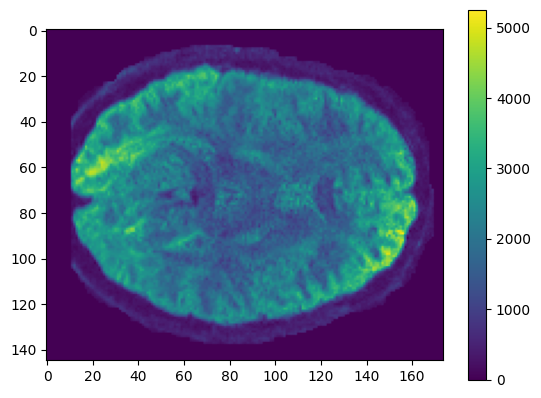

In [166]:
# %matplotlib notebook
plt.imshow(diff_input[:,:,35,1])
plt.colorbar()
plt.show()

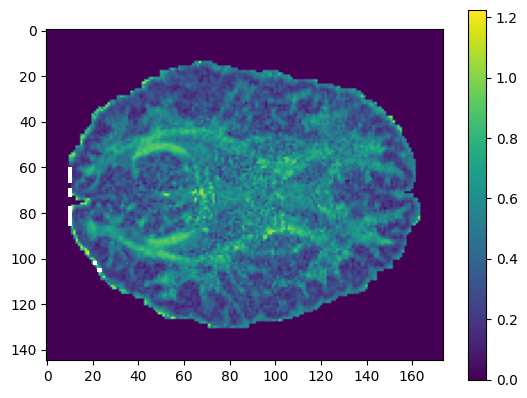

In [81]:
plt.imshow(dti_met['fa'][:,:,35])
plt.colorbar()

## Ground Truth for CNN

In [82]:
adcs_vec.shape

(2144550, 270)

In [83]:
amatrix(bvecs).shape

(270, 6)

In [108]:
bvecs.shape

(270, 3)

In [154]:
d = lstsq(amatrix(bvecs),adcs_vec.T,rcond=-1)

In [133]:
bvals.shape

(270,)

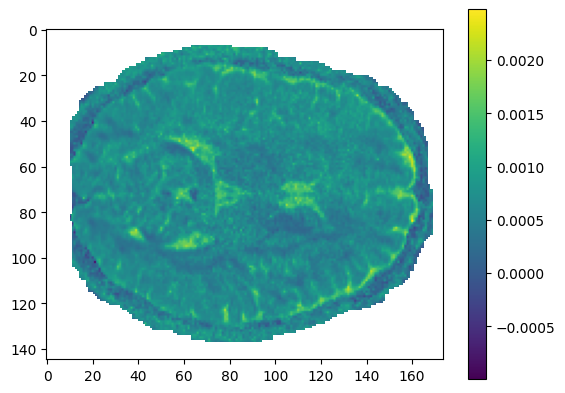

In [141]:
plt.imshow(adcs[:,:,35,5])
plt.colorbar()

In [167]:
# compute apparent diffusion coefficients
meanb0 = mean_volume(data,gtab,5)[...,np.newaxis]
# adcs = 
adcs = np.log(dwis / meanb0); # s = b0 * exp(-b * adc)
for i in range(adcs.shape[3]):
    adcs[:,:,:,i] = adcs[:,:,:,i] / (-bvals[i])

    
adcs_vec = adcs.reshape(data.shape[0]*data.shape[1]*data.shape[2],adcs.shape[3]) # tx volume data to vectors
tensor_gt_vec = lstsq(amatrix(bvecs),adcs_vec.T,rcond=-1)[0]
# tensor_gt_vec = pinv(amatrix(bvecs)) @ adcs_vec.T # solve tensors

tensor_gt = tensor_gt_vec.T.reshape(data.shape[0],data.shape[1],data.shape[2],6)
tensor_gt = np.nan_to_num(tensor_gt)
tensor_gt[tensor_gt == inf] = 0
# print(tensor_gt.max(),tensor_gt.min())


# # synthesize dwis along DSM6 dirs
dwis6norm_vec_gt = np.exp(-bval_synth * (amatrix(dsm_norm) @ tensor_gt_vec))
dwis6_gt = b0 * dwis6norm_vec_gt.T.reshape(data.shape[0],data.shape[1],data.shape[2], dwis6norm_vec_gt.shape[0]);    
dwis6_gt = np.nan_to_num(dwis6_gt)
dwis6_gt[dwis6_gt == inf] = 0

diff_gt = np.concatenate((meanb0,dwis6_gt),axis =3 )


/tmp/ipykernel_2962386/1198550623.py:4: RuntimeWarning: divide by zero encountered in divide
  adcs = np.log(dwis / meanb0); # s = b0 * exp(-b * adc)
/tmp/ipykernel_2962386/1198550623.py:4: RuntimeWarning: invalid value encountered in divide
  adcs = np.log(dwis / meanb0); # s = b0 * exp(-b * adc)
/tmp/ipykernel_2962386/1198550623.py:4: RuntimeWarning: divide by zero encountered in log
  adcs = np.log(dwis / meanb0); # s = b0 * exp(-b * adc)


In [162]:
dti = dtimetric(tensor_gt, mask);

/tmp/ipykernel_2962386/3724055110.py:48: RuntimeWarning: invalid value encountered in double_scalars
  FA = np.sqrt(sum((D-MD) ** 2)) / np.sqrt(sum(D**2)) * np.sqrt(1.5)


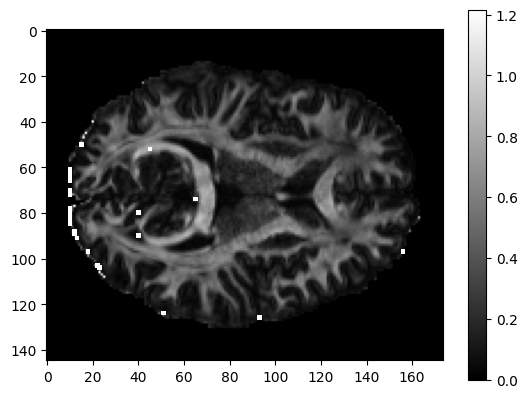

In [165]:
plt.imshow(dti['fa'][:,:,35],cmap='gray')
plt.colorbar()

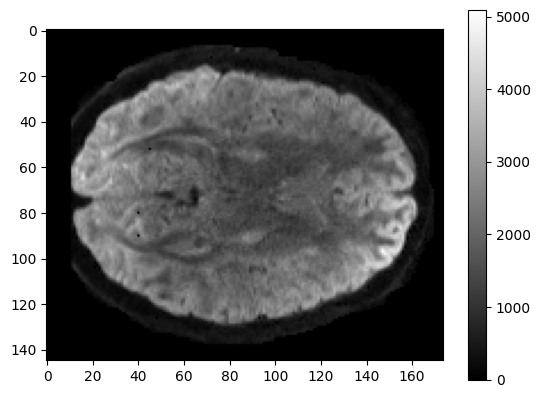

In [168]:
plt.imshow(diff_gt[:,:,35,2],cmap='gray')
plt.colorbar()

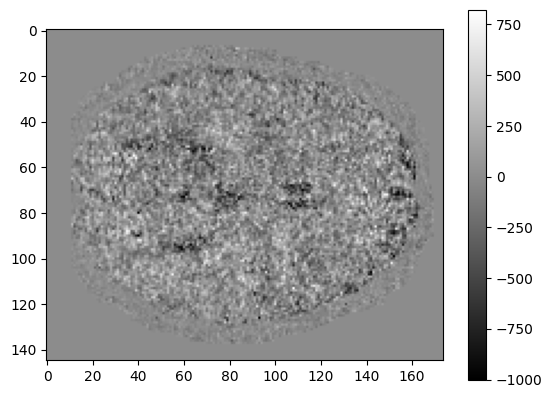

In [172]:
plt.imshow(np.clip(diff_gt[:,:,35,2] - diff_input[:,:,35,2],-1000,1000),cmap='gray')
plt.colorbar()

In [155]:
np.count_nonzero(~np.isnan(d[0]))/(d[0].shape[0] * d[0].shape[1] )

0.574715441467907